In [2]:
%matplotlib inline
import numpy as np 
from PIL import Image # 画像処理らいビラ利PillowのImageクラスをインポート
import matplotlib.pyplot as plt # 描画ライブラリ
import os 
import sys 
from keras.datasets import mnist # Kerasに内蔵されたMNISTを使う
import keras

Using TensorFlow backend.


In [3]:
def plot_mnist(X, y, result_dir): # Xは画像データ, yはラベル(0～9)
    row, col = 10,10 # 10行10列で画像を描画
    plt.figure() # 描画開始
    fig, axes = plt.subplots(
        row,col,figsize=(10,10), # 描画全体のサイズ(単位はインチ)
        gridspec_kw={'wspace':0, 'hspace':0.05}) # 画像間の上下間隔

    # 10種類ごとにまとめて描画
    nclasses = 10
    for targetClass in range(nclasses):
        targetIdx = []
        # クラスclassIDの画像のインデックスリストを取得
        for i in range(len(y)):
            if y[i] == targetClass: 
                targetIdx.append(i) 
                
        # 各クラスからランダムに選んだ最初の10個の画像を描画
        np.random.shuffle(targetIdx)
        for i in range(col):  
            idx = targetIdx[i]
            img = Image.fromarray(X[idx]) # 実数配列から画像データに変換
            axes[targetClass][i].set_axis_off() # 軸は表示しない
            axes[targetClass][i].imshow(img, cmap=plt.get_cmap('gray'))

    plt.savefig(os.path.join(result_dir, 'MNIST-sample.jpg')) # 画像を保存
    plt.show() 

[5 0 4 ... 5 6 8]
<class 'numpy.uint8'>
訓練画像データのシェープ： (60000, 28, 28)
テスト画像データのシェープ： (10000, 28, 28)
訓練ラベルデータのシェープ： (60000,)
テストラベルデータのシェープ： (10000,)


<Figure size 432x288 with 0 Axes>

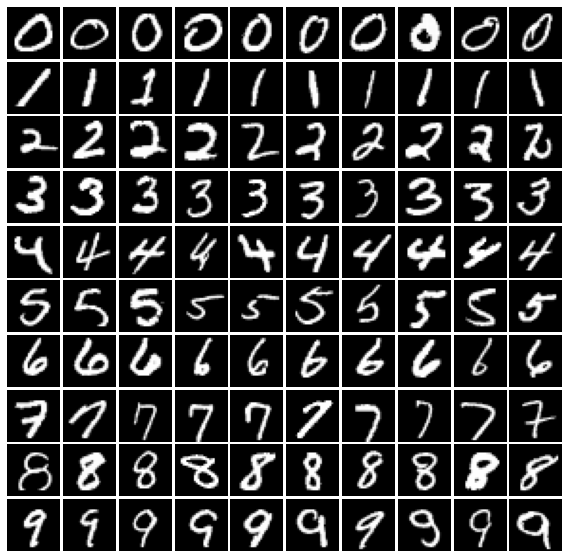

In [4]:
# MNISTデータをロード
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(y_train) # ラベルデータ（一部）をプリント
print(type(y_train[0])) # ラベルデータ（1番）が整数であることを確認

print("訓練画像データのシェープ：",x_train.shape)
print("テスト画像データのシェープ：",x_test.shape)
print("訓練ラベルデータのシェープ：",y_train.shape)
print("テストラベルデータのシェープ：",y_test.shape)
num_train_data = x_train.shape[0]
num_test_data = x_test.shape[0]

# 各クラス最初の10枚の画像をプロット
plot_mnist(x_train, y_train, 'output')

In [5]:
num_flatten_data = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(num_train_data, num_flatten_data)
x_test = x_test.reshape(num_test_data, num_flatten_data)

num_gray_scale_max = 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= num_gray_scale_max
x_test /= num_gray_scale_max
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# ラベルを整数値からワンホットベクトル値に変換
num_classes = 10 # クラス数(10)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(type(y_train))
print(y_train) #ワンホット・ベクトル変換を確認

60000 train samples
10000 test samples
(60000, 10)
<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [6]:
from keras.models import Model, Sequential 
from keras.layers import Input, Dense, Dropout 
from keras.optimizers import RMSprop
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile( 
    loss='categorical_crossentropy',
    optimizer=RMSprop(), 
    metrics=['accuracy']) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128 # バッチサイズ(128)
epochs = 50 # エポック(50)

history = model.fit( 
    x_train, y_train, #訓練用画像データと正解ラベルデータ
    batch_size=batch_size, # バッチのサイズ
    epochs=epochs, #エポック数
    verbose=1, # 訓練の進行度合いを表示
    validation_data=(x_test, y_test))# テストデータ